In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 24.5 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import optuna
from optuna.pruners import MedianPruner
import logging
import random
import time
import pickle
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.metrics import roc_curve, auc, roc_auc_score

import warnings
warnings.filterwarnings("ignore", message="The verbose parameter is deprecated")

[I 2025-05-09 16:33:15,108] A new study created in memory with name: no-name-b875bb04-9de0-49f3-bb0e-24ed798c270b
[I 2025-05-09 16:45:17,377] Trial 0 finished with value: 0.8460235878809836 and parameters: {'batch_size': 256, 'lr': 1.686215430917146e-05, 'heads': 4, 'ff': 2048, 'layers': 2, 'drop': 0.38742452286344575, 'wd': 0.0004930087001271742}. Best is trial 0 with value: 0.8460235878809836.
[I 2025-05-09 16:53:53,075] Trial 1 finished with value: 0.8201307525698159 and parameters: {'batch_size': 128, 'lr': 0.00020809666385934397, 'heads': 8, 'ff': 4096, 'layers': 3, 'drop': 0.22894481132239325, 'wd': 1.4916923813720396e-05}. Best is trial 0 with value: 0.8460235878809836.
[I 2025-05-09 17:01:11,106] Trial 2 finished with value: 0.8385167785086395 and parameters: {'batch_size': 128, 'lr': 0.00014738191518893568, 'heads': 4, 'ff': 2048, 'layers': 2, 'drop': 0.23173436937027753, 'wd': 6.954808465306033e-06}. Best is trial 0 with value: 0.8460235878809836.
[I 2025-05-09 17:18:44,261] 


FOLD 1 CROSS-VALIDATION TEST FOLD RESULTS
F1 Score on CV test fold: 0.8530
Validation Loss on CV test fold: 0.4033


===== FOLD 1 METRICS =====

Model Performance Metrics:
  F1 Score:   0.8530
  Precision:  0.8282
  Recall:     0.8793
  Accuracy:   0.8148

Confusion Matrix:
  True Positives:  15695
  False Positives: 3256
  True Negatives:  8113
  False Negatives: 2154



[I 2025-05-09 18:37:31,698] A new study created in memory with name: no-name-dd2384bb-4f4f-464c-8f2f-8ab9594aea79
[I 2025-05-09 18:53:23,163] Trial 0 finished with value: 0.8499379521553706 and parameters: {'batch_size': 512, 'lr': 3.3087874514432986e-05, 'heads': 4, 'ff': 3072, 'layers': 4, 'drop': 0.17076420254980917, 'wd': 0.0004935158130454255}. Best is trial 0 with value: 0.8499379521553706.
[I 2025-05-09 19:07:34,634] Trial 1 finished with value: 0.8456518768634148 and parameters: {'batch_size': 512, 'lr': 2.0581540933617182e-05, 'heads': 8, 'ff': 3072, 'layers': 3, 'drop': 0.37850564503894546, 'wd': 1.1412578852841823e-06}. Best is trial 0 with value: 0.8499379521553706.
[I 2025-05-09 19:26:40,718] Trial 2 finished with value: 0.8492745961502538 and parameters: {'batch_size': 128, 'lr': 1.4829213879463744e-05, 'heads': 8, 'ff': 2048, 'layers': 3, 'drop': 0.34320598663987967, 'wd': 0.00041041929406546537}. Best is trial 0 with value: 0.8499379521553706.
[I 2025-05-09 19:41:37,109


FOLD 2 CROSS-VALIDATION TEST FOLD RESULTS
F1 Score on CV test fold: 0.8478
Validation Loss on CV test fold: 0.4185


===== FOLD 2 METRICS =====

Model Performance Metrics:
  F1 Score:   0.8478
  Precision:  0.8144
  Recall:     0.8841
  Accuracy:   0.8061

Confusion Matrix:
  True Positives:  15779
  False Positives: 3595
  True Negatives:  7775
  False Negatives: 2069



[I 2025-05-09 20:41:57,153] A new study created in memory with name: no-name-b094d81b-4657-4269-9830-7110af489913
[I 2025-05-09 20:55:18,035] Trial 0 finished with value: 0.8475191579085122 and parameters: {'batch_size': 512, 'lr': 0.0001310486799653007, 'heads': 12, 'ff': 4096, 'layers': 4, 'drop': 0.2976658895888169, 'wd': 4.1278262805186715e-06}. Best is trial 0 with value: 0.8475191579085122.
[I 2025-05-09 21:03:22,602] Trial 1 finished with value: 0.8466001704122236 and parameters: {'batch_size': 512, 'lr': 8.674910115976198e-05, 'heads': 4, 'ff': 2048, 'layers': 3, 'drop': 0.3530914584629655, 'wd': 2.8417185068978175e-06}. Best is trial 0 with value: 0.8475191579085122.
[I 2025-05-09 21:15:36,045] Trial 2 finished with value: 0.846645425780688 and parameters: {'batch_size': 512, 'lr': 0.00018401884510910763, 'heads': 12, 'ff': 4096, 'layers': 3, 'drop': 0.1715826906550123, 'wd': 1.898245819531063e-05}. Best is trial 0 with value: 0.8475191579085122.
[I 2025-05-09 21:22:19,510] Tr


FOLD 3 CROSS-VALIDATION TEST FOLD RESULTS
F1 Score on CV test fold: 0.8522
Validation Loss on CV test fold: 0.4128


===== FOLD 3 METRICS =====

Model Performance Metrics:
  F1 Score:   0.8522
  Precision:  0.8170
  Recall:     0.8906
  Accuracy:   0.8113

Confusion Matrix:
  True Positives:  15895
  False Positives: 3560
  True Negatives:  7810
  False Negatives: 1953



[I 2025-05-09 22:49:53,613] A new study created in memory with name: no-name-7a1ca761-3306-43b2-adad-697ecf4b470c
[I 2025-05-09 22:55:55,965] Trial 0 finished with value: 0.8347398735468724 and parameters: {'batch_size': 512, 'lr': 0.0008273836048528957, 'heads': 8, 'ff': 3072, 'layers': 2, 'drop': 0.33786943381896695, 'wd': 7.088474989584537e-06}. Best is trial 0 with value: 0.8347398735468724.
[I 2025-05-09 23:01:18,446] Trial 1 finished with value: 0.7584349635979811 and parameters: {'batch_size': 256, 'lr': 0.0009872742617493275, 'heads': 8, 'ff': 3072, 'layers': 4, 'drop': 0.12371623830628364, 'wd': 6.900175752390943e-05}. Best is trial 0 with value: 0.8347398735468724.
[I 2025-05-09 23:11:07,963] Trial 2 finished with value: 0.8458952611213405 and parameters: {'batch_size': 256, 'lr': 0.00010980231651062378, 'heads': 8, 'ff': 3072, 'layers': 3, 'drop': 0.2757432944200778, 'wd': 0.0009349875282040553}. Best is trial 2 with value: 0.8458952611213405.
[I 2025-05-09 23:21:03,744] Tri


FOLD 4 CROSS-VALIDATION TEST FOLD RESULTS
F1 Score on CV test fold: 0.8507
Validation Loss on CV test fold: 0.4195


===== FOLD 4 METRICS =====

Model Performance Metrics:
  F1 Score:   0.8507
  Precision:  0.8157
  Recall:     0.8888
  Accuracy:   0.8094

Confusion Matrix:
  True Positives:  15864
  False Positives: 3584
  True Negatives:  7786
  False Negatives: 1984



[I 2025-05-10 00:12:59,210] A new study created in memory with name: no-name-509f6b88-657b-4a92-97c3-eb0664382008
[I 2025-05-10 00:19:04,338] Trial 0 finished with value: 0.7584309350771573 and parameters: {'batch_size': 128, 'lr': 0.0007859146930310948, 'heads': 4, 'ff': 4096, 'layers': 3, 'drop': 0.30253767895744815, 'wd': 8.1060505590359e-05}. Best is trial 0 with value: 0.7584309350771573.
[I 2025-05-10 00:24:54,567] Trial 1 finished with value: 0.7584309350771573 and parameters: {'batch_size': 512, 'lr': 0.00043863214262761154, 'heads': 8, 'ff': 3072, 'layers': 4, 'drop': 0.3045580436556373, 'wd': 4.113118916910612e-06}. Best is trial 0 with value: 0.7584309350771573.
[I 2025-05-10 00:33:37,938] Trial 2 finished with value: 0.8469269834508985 and parameters: {'batch_size': 256, 'lr': 0.0001569758451437001, 'heads': 4, 'ff': 2048, 'layers': 3, 'drop': 0.35199542777196335, 'wd': 6.344958249412132e-05}. Best is trial 2 with value: 0.8469269834508985.
[I 2025-05-10 00:56:28,602] Trial


FOLD 5 CROSS-VALIDATION TEST FOLD RESULTS
F1 Score on CV test fold: 0.8534
Validation Loss on CV test fold: 0.4041


===== FOLD 5 METRICS =====

Model Performance Metrics:
  F1 Score:   0.8534
  Precision:  0.8199
  Recall:     0.8898
  Accuracy:   0.8133

Confusion Matrix:
  True Positives:  15881
  False Positives: 3488
  True Negatives:  7881
  False Negatives: 1967


Nested CV final F1: 0.8514 ± 0.0020
Fold scores: ['0.8530', '0.8478', '0.8522', '0.8507', '0.8534']
Fold best epochs: [32, 10, 17, 9, 27]

Fold Metrics Summary:
           f1  precision  recall  accuracy         tp         fp        tn  \
count  5.0000     5.0000  5.0000    5.0000      5.000     5.0000     5.000   
mean   0.8514     0.8191  0.8865    0.8110  15822.800  3496.6000  7873.000   
std    0.0023     0.0055  0.0048    0.0034     84.482   140.8041   140.362   
min    0.8478     0.8144  0.8793    0.8061  15695.000  3256.0000  7775.000   
25%    0.8507     0.8157  0.8841    0.8094  15779.000  3488.0000  7786.000

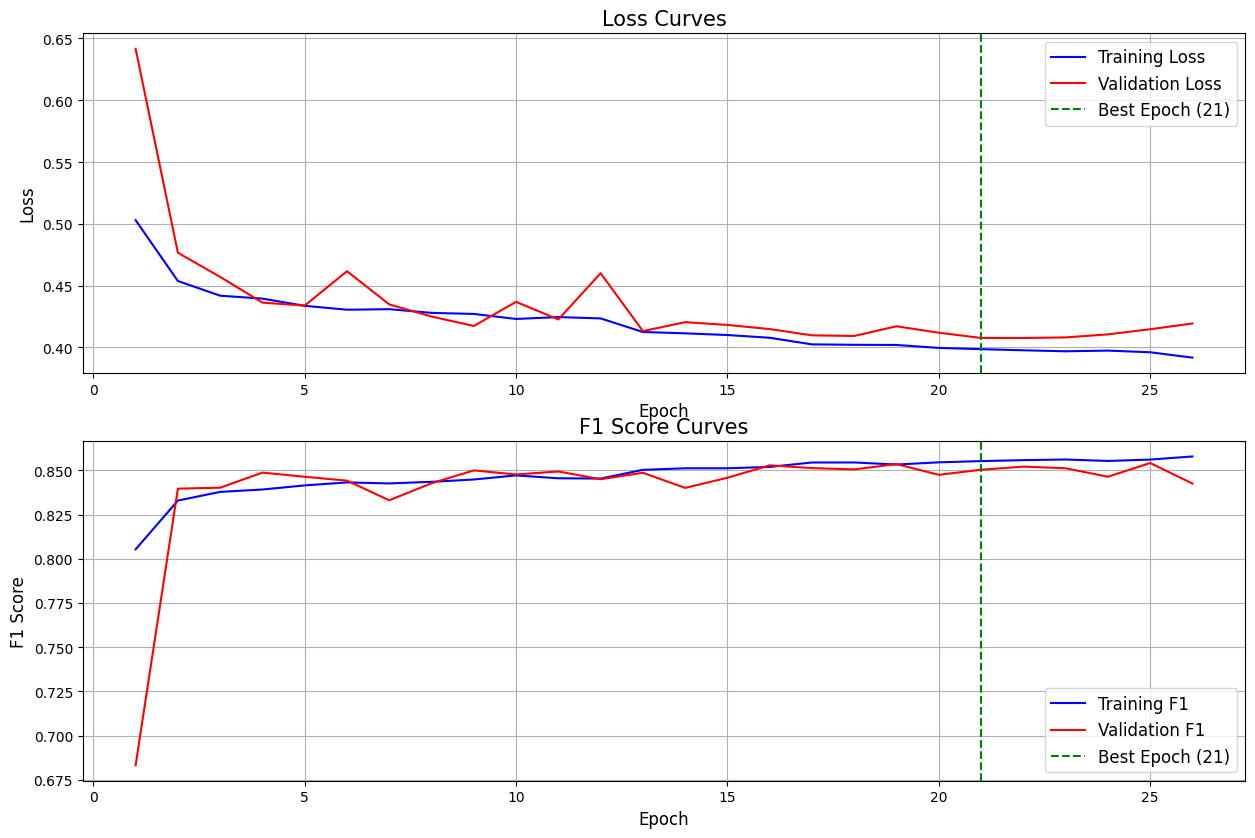

In [ ]:
#Set random seeds for reproducibility
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

SEED = 42
set_seed(SEED)

# 1. Logging and device configuration
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logger.info(f"Using device: {device}")

# 2. Data loading
TRAIN_PATH = '/content/drive/MyDrive/pretrained_train_val_with_structured_final.csv'
TEST_PATH  = '/content/drive/MyDrive/pretrained_test_with_structured_final.csv'
raw_df = pd.read_csv(TRAIN_PATH)
raw_train = raw_df.copy()
test_df = pd.read_csv(TEST_PATH)
logger.info(f"Raw train shape: {raw_train.shape}, Test shape: {test_df.shape}")

# 3. Drop unused columns
to_drop = ['project_number', 'photo']
raw_train = raw_train.drop(columns=to_drop, errors='ignore')
test_df = test_df.drop(columns=to_drop, errors='ignore')

# 3.5 log-transform
log_cols = ["goal_usd", "preparation_days", "creator_backing_count"]
for col in log_cols:
    raw_train[col] = np.log1p(raw_train[col])
    test_df[col]   = np.log1p(test_df[col])

# 4. Feature lists
TEXT_DIM = 768
NUM_COLS = ["duration","preparation_days","goal_usd",
            "creator_backing_count","blurb_word_count","name_word_count"]
BOOL_COLS= ["prelaunch_activated","staff_pick","has_video"]
CAT_COLS = ["country_displayable_name","parent_category","quarter","gender"]
TARGET   = 'state_binary'

# 5. Dataset class
class MultiTokenDataset(Dataset):
    def __init__(self, df: pd.DataFrame):
        self.text = df.iloc[:, :TEXT_DIM].values.astype('float32')
        self.num  = df[NUM_COLS].values.astype('float32')
        self.bool = df[BOOL_COLS].astype(float).values.astype('float32')
        self.cat  = {col: df[col].values for col in CAT_COLS}
        self.y    = df[TARGET].values.astype('float32')

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        text = torch.from_numpy(self.text[idx])
        num  = torch.from_numpy(self.num[idx])
        bool_ = torch.from_numpy(self.bool[idx])
        cat  = {col: torch.tensor(self.cat[col][idx], dtype=torch.long) for col in CAT_COLS}
        y    = torch.tensor(self.y[idx], dtype=torch.float32)
        return text, num, bool_, cat, y

# 6. Model definitions
class MultiTokenProjector(nn.Module):
    def __init__(self, num_num, num_bool, cat_cards, hidden=128, emb_dim=768, drop=0.1):
        super().__init__()
        self.num_proj = nn.Sequential(
            nn.LayerNorm(num_num), nn.Linear(num_num, hidden), nn.GELU(), nn.Dropout(drop), nn.Linear(hidden, emb_dim)
        )
        self.bool_proj= nn.Sequential(
            nn.LayerNorm(num_bool), nn.Linear(num_bool, hidden), nn.GELU(), nn.Dropout(drop), nn.Linear(hidden, emb_dim)
        )
        self.cat_nets = nn.ModuleDict({
            col: nn.Sequential(
                nn.Embedding(card, min(64, card)), nn.LayerNorm(min(64, card)),
                nn.Linear(min(64, card), hidden), nn.GELU(), nn.Dropout(drop), nn.Linear(hidden, emb_dim)
            ) for col, card in cat_cards.items()
        })
    def forward(self, num_x, bool_x, cat_x):
        tokens = [self.num_proj(num_x), self.bool_proj(bool_x)]
        for col, net in self.cat_nets.items():
            tokens.append(net(cat_x[col]))
        return torch.stack(tokens, dim=1)

class MultiTokenEarlyFusionTransformer(nn.Module):
    def __init__(self,
                 n_num, n_bool, cat_cards,
                 text_dim: int    = 768,
                 struct_dim: int = 768,
                 heads: int      = 12,
                 ff: int         = 3072,
                 layers: int     = 6,
                 drop: float     = 0.1,
                 activation: str = 'gelu',
    ):
        super().__init__()
        self.struct_proj = MultiTokenProjector(n_num, n_bool, cat_cards,
                                               hidden=128, emb_dim=struct_dim, drop=drop)

        self.total_struct = 2 + len(cat_cards)

        # CLS + struct tokens + text token
        seq_len = 1 + self.total_struct + 1

        self.cls = nn.Parameter(torch.randn(1, 1, text_dim))
        self.pos = nn.Parameter(torch.randn(1, seq_len, text_dim))

        enc_layer = nn.TransformerEncoderLayer(
            d_model=text_dim,
            nhead=heads,
            dim_feedforward=ff,
            dropout=drop,
            activation=activation,
            batch_first=True,
        )
        self.enc = nn.TransformerEncoder(enc_layer, layers)
        self.head = nn.Linear(text_dim, 1)

    def forward(self, text, num, bool_, cat):
        B = text.size(0)
        struct = self.struct_proj(num, bool_, cat)         # (B, total_struct, dim)
        cls    = self.cls.expand(B, -1, -1)                # (B, 1, dim)
        txt    = text.unsqueeze(1)                         # (B, 1, dim)
        x      = torch.cat([cls, struct, txt], dim=1)      # (B, seq_len, dim)


        x = x + self.pos

        out = self.enc(x)
        return self.head(out[:, 0])

# 7. Training utilities
class EarlyStopping:
    def __init__(self, patience=5, delta=1e-4, verbose=False, path='best.pt', cumulative=False):
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = float('inf')  # Initialize with infinity for loss minimization
        self.early_stop = False
        self.path = path
        self.best_epoch = 0
        self.current_epoch = 0
        self.cumulative = cumulative

    def __call__(self, val_loss, model, epoch):
        self.current_epoch = epoch
        # For loss, lower is better
        if val_loss < self.best_loss - self.delta:
            if self.verbose:
                improvement = self.best_loss - val_loss
                logger.info(f'Validation loss decreased ({self.best_loss:.6f} → {val_loss:.6f}). Saving model to {self.path}')
            self.best_loss = val_loss
            self.best_epoch = epoch
            self.counter = 0
            torch.save(model.state_dict(), self.path)
        else:
            self.counter += 1
            if self.verbose:
                logger.info(f'EarlyStopping counter: {self.counter}/{self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    logger.info(f'Early stopping triggered at epoch {epoch}. Best was epoch {self.best_epoch} with loss: {self.best_loss:.4f}')


def train_epoch(model, loader, opt, crit):
    model.train()
    total_loss = 0.0
    all_preds, all_trues = [], []

    for text, num_x, bool_x, cat_x, y in loader:
        text, num_x, bool_x, y = text.to(device), num_x.to(device), bool_x.to(device), y.unsqueeze(1).to(device)
        cat_x = {k: v.to(device) for k, v in cat_x.items()}
        opt.zero_grad()
        preds = model(text, num_x, bool_x, cat_x)
        loss = crit(preds, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        opt.step()

        total_loss += loss.item() * text.size(0)
        all_preds.extend(torch.sigmoid(preds).detach().cpu().numpy().flatten())
        all_trues.extend(y.detach().cpu().numpy().flatten())

    # Calculate F1 score for training data
    binary_preds = (np.array(all_preds) >= 0.5).astype(int)
    train_f1 = f1_score(all_trues, binary_preds)

    return total_loss / len(loader.dataset), train_f1

def eval_epoch(model, loader, crit):
    model.eval()
    total_loss, preds, trues = 0.0, [], []
    with torch.no_grad():
        for text, num_x, bool_x, cat_x, y in loader:
            text, num_x, bool_x, y = text.to(device), num_x.to(device), bool_x.to(device), y.unsqueeze(1).to(device)
            cat_x = {k: v.to(device) for k, v in cat_x.items()}
            logits = model(text, num_x, bool_x, cat_x)
            total_loss += crit(logits, y).item() * text.size(0)
            preds.extend(torch.sigmoid(logits).cpu().numpy().flatten())
            trues.extend(y.cpu().numpy().flatten())
    binary = (np.array(preds) >= 0.5).astype(int)
    return total_loss / len(loader.dataset), f1_score(trues, binary), preds, trues

# New function to calculate and print all metrics
def calculate_metrics(y_true, y_pred_probs):
    y_pred = (np.array(y_pred_probs) >= 0.5).astype(int)

    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    print("\n" + "="*50)
    print("Model Performance Metrics:")
    print(f"  F1 Score:   {f1:.4f}")
    print(f"  Precision:  {precision:.4f}")
    print(f"  Recall:     {recall:.4f}")
    print(f"  Accuracy:   {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(f"  True Positives:  {tp}")
    print(f"  False Positives: {fp}")
    print(f"  True Negatives:  {tn}")
    print(f"  False Negatives: {fn}")
    print("="*50 + "\n")

    return {
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'tp': tp,
        'fp': fp,
        'tn': tn,
        'fn': fn
    }

# 8. Objective factory for nested CV tuning
def make_objective(df_train):
    def objective(trial):
        params = {
            'batch_size': trial.suggest_categorical('batch_size', [128, 256, 512]),
            'lr':         trial.suggest_float('lr', 1e-5, 1e-3, log=True),
            'heads':      trial.suggest_categorical('heads', [4, 8, 12]),
            'ff':         trial.suggest_categorical('ff', [2048, 3072, 4096]),
            'layers':     trial.suggest_int('layers', 2, 4),
            'drop':       trial.suggest_float('drop', 0.1, 0.4),
            'wd':         trial.suggest_float('wd', 1e-6, 1e-3, log=True)
        }

        # Use stratified K-fold with 3 splits
        skf = StratifiedKFold(3, shuffle=True, random_state=SEED)
        y_all = df_train[TARGET].values
        f1s = []

        for fold, (tr_idx, va_idx) in enumerate(skf.split(df_train, y_all), 1):
            # Prepare datasets
            df_tr = df_train.iloc[tr_idx].reset_index(drop=True)
            df_va = df_train.iloc[va_idx].reset_index(drop=True)

            # Preprocessing
            scaler = StandardScaler().fit(df_tr[NUM_COLS])
            df_tr[NUM_COLS] = scaler.transform(df_tr[NUM_COLS])
            df_va[NUM_COLS] = scaler.transform(df_va[NUM_COLS])

            for col in CAT_COLS:
                le = LabelEncoder().fit(df_tr[col].astype(str))
                df_tr[col] = le.transform(df_tr[col].astype(str))
                df_va[col] = le.transform(df_va[col].astype(str))

            # Create data loaders
            tr_ld = DataLoader(
                MultiTokenDataset(df_tr),
                batch_size=params['batch_size'],
                shuffle=True,
                pin_memory=True,
                num_workers=4
            )
            va_ld = DataLoader(
                MultiTokenDataset(df_va),
                batch_size=params['batch_size']*2,
                pin_memory=True,
                num_workers=4
            )

            # Initialize model
            model = MultiTokenEarlyFusionTransformer(
                len(NUM_COLS),
                len(BOOL_COLS),
                {c: raw_train[c].nunique() for c in CAT_COLS},
                heads=params['heads'],
                ff=params['ff'],
                layers=params['layers'],
                drop=params['drop'],
                activation='gelu'
            ).to(device)

            # Initialize optimizer and loss
            opt = torch.optim.AdamW(model.parameters(), lr=params['lr'], weight_decay=params['wd'])
            crit = nn.BCEWithLogitsLoss()

            # Learning rate scheduler
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                opt, mode='min', factor=0.5, patience=2, min_lr=1e-6, verbose=False
            )

            # Initialize early stopping with validation loss
            es = EarlyStopping(patience=5, path=f'tmp_fold{fold}.pt', verbose=True, cumulative=False)

            # Training loop
            for epoch in range(1, 100):
                train_loss, _ = train_epoch(model, tr_ld, opt, crit)
                val_loss, f1, _, _ = eval_epoch(model, va_ld, crit)

                # Update learning rate
                scheduler.step(val_loss)

                # Report to Optuna for pruning - still use F1 for pruning
                if fold == 1:
                    trial.report(f1, epoch)
                    if trial.should_prune():
                        raise optuna.exceptions.TrialPruned()

                # Check early stopping using validation loss
                es(val_loss, model, epoch)  # Pass validation loss and current epoch
                if es.early_stop:
                    break

            # Load best model and evaluate
            model.load_state_dict(torch.load(f'tmp_fold{fold}.pt'))
            _, f1, _, _ = eval_epoch(model, va_ld, crit)
            f1s.append(f1)

        # Return mean F1 score
        mean_f1 = np.mean(f1s)
        logger.info(f"[TUNING] Mean CV F1: {mean_f1:.4f}")
        return mean_f1

    return objective

# Enhanced function for final model training and visualization
def train_final_model_with_visualization(raw_train, test_df, best_params, max_epochs=100):
    print("\n" + "="*80)
    print(" TRAINING FINAL MODEL ON FULL DATASET")
    print("="*80)

    # Create a validation split
    train_data, val_data = train_test_split(
        raw_train,
        test_size=0.1,  # Use 10% for validation
        stratify=raw_train[TARGET],
        random_state=SEED
    )

    # Preprocess data
    scaler = StandardScaler().fit(train_data[NUM_COLS])
    train_data[NUM_COLS] = scaler.transform(train_data[NUM_COLS])
    val_data[NUM_COLS] = scaler.transform(val_data[NUM_COLS])

    for col in CAT_COLS:
        le = LabelEncoder().fit(train_data[col].astype(str))
        train_data[col] = le.transform(train_data[col].astype(str))
        val_data[col] = le.transform(val_data[col].astype(str))


    # Create DataLoaders
    bs = best_params['batch_size']
    train_loader = DataLoader(
        MultiTokenDataset(train_data),
        batch_size=bs,
        shuffle=True,
        pin_memory=True,
        num_workers=4
    )
    val_loader = DataLoader(
        MultiTokenDataset(val_data),
        batch_size=bs*2,
        pin_memory=True,
        num_workers=4
    )

    # Initialize model with best parameters
    model = MultiTokenEarlyFusionTransformer(
        len(NUM_COLS),
        len(BOOL_COLS),
        {c: raw_train[c].nunique() for c in CAT_COLS},
        heads=best_params['heads'],
        ff=best_params['ff'],
        layers=best_params['layers'],
        drop=best_params['drop'],
        activation='gelu'
    ).to(device)

    # Initialize optimizer and loss
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=best_params['lr'],
        weight_decay=best_params['wd']
    )
    criterion = nn.BCEWithLogitsLoss()

    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=2, min_lr=1e-6, verbose=False
    )

    # Initialize early stopping with validation loss
    early_stopping = EarlyStopping(patience=5, path="best_final_model.pt", verbose=True, cumulative=False)

    # Training loop with metric tracking
    history = {
        'epoch': [],
        'train_loss': [],
        'val_loss': [],
        'train_f1': [],
        'val_f1': [],
        'learning_rate': []
    }

    logger.info(f"Training final model for up to {max_epochs} epochs")

    for epoch in range(1, max_epochs + 1):
        # Train and evaluate
        train_loss, train_f1 = train_epoch(model, train_loader, optimizer, criterion)
        val_loss, val_f1, val_preds, val_trues = eval_epoch(model, val_loader, criterion)

        # Update learning rate
        current_lr = optimizer.param_groups[0]['lr']
        scheduler.step(val_loss)

        # Track metrics
        history['epoch'].append(epoch)
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_f1'].append(train_f1)
        history['val_f1'].append(val_f1)
        history['learning_rate'].append(current_lr)

        # Log progress
        logger.info(f"Epoch {epoch}/{max_epochs} - Train loss: {train_loss:.4f}, Train F1: {train_f1:.4f}, "
                    f"Val loss: {val_loss:.4f}, Val F1: {val_f1:.4f}, LR: {current_lr:.2e}")

        # Check early stopping using validation loss
        early_stopping(val_loss, model, epoch)
        if early_stopping.early_stop:
            logger.info(f"Early stopping triggered after {epoch} epochs")
            break

    # Print best epoch info
    best_epoch = early_stopping.best_epoch
    logger.info(f"Best model was at epoch {best_epoch} with validation loss: {early_stopping.best_loss:.4f}")

    # Load best model for evaluation
    model.load_state_dict(torch.load("best_final_model.pt"))

    # Evaluate on validation set with loaded best model
    val_loss, val_f1, val_preds, val_trues = eval_epoch(model, val_loader, criterion)
    logger.info(f"Final validation F1: {val_f1:.4f}, Loss: {val_loss:.4f}")

    # Calculate detailed metrics
    print("\n===== FINAL MODEL METRICS ON VALIDATION SET =====")
    val_metrics = calculate_metrics(val_trues, val_preds)

    # Visualize training history
    plt.figure(figsize=(15, 15))

    # Plot losses
    plt.subplot(3, 1, 1)
    plt.plot(history['epoch'], history['train_loss'], 'b-', label='Training Loss')
    plt.plot(history['epoch'], history['val_loss'], 'r-', label='Validation Loss')
    plt.axvline(x=best_epoch, color='g', linestyle='--', label=f'Best Epoch ({best_epoch})')
    plt.title('Loss Curves', fontsize=15)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Plot F1 scores
    plt.subplot(3, 1, 2)
    plt.plot(history['epoch'], history['train_f1'], 'b-', label='Training F1')
    plt.plot(history['epoch'], history['val_f1'], 'r-', label='Validation F1')
    plt.axvline(x=best_epoch, color='g', linestyle='--', label=f'Best Epoch ({best_epoch})')
    plt.title('F1 Score Curves', fontsize=15)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)



    # Return results
    return {
        'model': model,
        'predictions': val_preds,
        'true_values': val_trues,
        'metrics': val_metrics,
        'history': history,
        'best_epoch': best_epoch,
        'best_loss': early_stopping.best_loss
    }

# 9. Main: Nested Cross-Validation
if __name__ == "__main__":
    # Nested cross-validation
    outer_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    outer_scores = []
    best_params_list = []
    fold_epochs = []
    fold_metrics = []

    # Loop through outer folds
    for fold, (train_idx, test_idx) in enumerate(outer_skf.split(raw_train, raw_train[TARGET]), 1):
        logger.info(f"Starting outer fold {fold}")

        # Split data
        df_outer_tr = raw_train.iloc[train_idx].reset_index(drop=True)
        df_outer_te = raw_train.iloc[test_idx].reset_index(drop=True)

        # Hyperparameter tuning
        study = optuna.create_study(direction="maximize", pruner=MedianPruner())
        study.optimize(make_objective(df_outer_tr), n_trials=25)
        best_params = study.best_trial.params
        best_params_list.append(best_params)
        logger.info(f"Fold {fold} best params: {best_params}")

        # Preprocess data
        scaler = StandardScaler().fit(df_outer_tr[NUM_COLS])
        df_outer_tr[NUM_COLS] = scaler.transform(df_outer_tr[NUM_COLS])
        df_outer_te[NUM_COLS] = scaler.transform(df_outer_te[NUM_COLS])

        for col in CAT_COLS:
            le = LabelEncoder().fit(df_outer_tr[col].astype(str))
            df_outer_tr[col] = le.transform(df_outer_tr[col].astype(str))
            df_outer_te[col] = le.transform(df_outer_te[col].astype(str))

        # Create DataLoaders
        bs = best_params['batch_size']
        tr_ld = DataLoader(MultiTokenDataset(df_outer_tr), batch_size=bs, shuffle=True, pin_memory=True, num_workers=4)
        te_ld = DataLoader(MultiTokenDataset(df_outer_te), batch_size=bs*2, pin_memory=True, num_workers=4)

        # Initialize model
        model = MultiTokenEarlyFusionTransformer(
            len(NUM_COLS),
            len(BOOL_COLS),
            {c: raw_train[c].nunique() for c in CAT_COLS},
            heads=best_params['heads'],
            ff=best_params['ff'],
            layers=best_params['layers'],
            drop=best_params['drop'],
            activation='gelu'
        ).to(device)

        # Initialize optimizer and loss
        opt = torch.optim.AdamW(model.parameters(), lr=best_params['lr'], weight_decay=best_params['wd'])
        crit = nn.BCEWithLogitsLoss()

        # Learning rate scheduler
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            opt, mode='min', factor=0.5, patience=2, min_lr=1e-6, verbose=False
        )

        # Initialize early stopping with validation loss
        es = EarlyStopping(patience=5, path=f"best_outer_{fold}.pt", verbose=True, cumulative=False)

        # Training loop with history tracking
        fold_history = {
            'epoch': [],
            'train_loss': [],
            'train_f1': [],
            'val_loss': [],
            'val_f1': [],
            'learning_rate': []
        }

        for epoch in range(1, 100):
            train_loss, train_f1 = train_epoch(model, tr_ld, opt, crit)
            val_loss, val_f1, _, _ = eval_epoch(model, te_ld, crit)

            # Update learning rate
            current_lr = opt.param_groups[0]['lr']
            scheduler.step(val_loss)

            # Store metrics
            fold_history['epoch'].append(epoch)
            fold_history['train_loss'].append(train_loss)
            fold_history['train_f1'].append(train_f1)
            fold_history['val_loss'].append(val_loss)
            fold_history['val_f1'].append(val_f1)
            fold_history['learning_rate'].append(current_lr)

            # Log progress
            logger.info(f"Fold {fold}, Epoch {epoch} - Train loss: {train_loss:.4f}, Train F1: {train_f1:.4f}, "
                      f"Val loss: {val_loss:.4f}, Val F1: {val_f1:.4f}, LR: {current_lr:.2e}")

            # Check early stopping using validation loss
            es(val_loss, model, epoch)
            if es.early_stop:
                break

        # Track epochs and visualize fold results
        fold_epochs.append(es.best_epoch)
        logger.info(f"Fold {fold} best epoch: {es.best_epoch} with loss: {es.best_loss:.4f}")

        # Save fold history
        with open(f'fold_{fold}_history.pkl', 'wb') as f:
            pickle.dump(fold_history, f)



        # Load best model and evaluate
        model.load_state_dict(torch.load(f"best_outer_{fold}.pt"))
        val_loss, f1_test, preds, trues = eval_epoch(model, te_ld, crit)

        print(f"\n{'='*50}")
        print(f"FOLD {fold} CROSS-VALIDATION TEST FOLD RESULTS")
        print(f"F1 Score on CV test fold: {f1_test:.4f}")
        print(f"Validation Loss on CV test fold: {val_loss:.4f}")
        print(f"{'='*50}\n")

        # Calculate metrics
        print(f"\n===== FOLD {fold} METRICS =====")
        fold_metric = calculate_metrics(trues, preds)
        fold_metrics.append(fold_metric)

        # Track scores
        outer_scores.append(fold_metric['f1'])
        logger.info(f"Fold {fold} outer F1: {fold_metric['f1']:.4f}, Loss: {val_loss:.4f}")

    # Report CV results
    mean_score, std_score = np.mean(outer_scores), np.std(outer_scores)
    print(f"\n" + "="*80)
    print(f"Nested CV final F1: {mean_score:.4f} ± {std_score:.4f}")
    print("Fold scores:", [f"{s:.4f}" for s in outer_scores])
    print("Fold best epochs:", fold_epochs)

    # Summary of metrics
    print("\nFold Metrics Summary:")
    metrics_df = pd.DataFrame(fold_metrics)
    print(metrics_df.describe().round(4))

    # Select best fold and train final model
    best_idx = int(np.argmax(outer_scores))
    print(f"\nBest fold: {best_idx+1} with F1: {outer_scores[best_idx]:.4f}")
    print(f"Best fold's optimal epoch: {fold_epochs[best_idx]}")
    final_params = best_params_list[best_idx]

    print("\nBest fold hyperparameters:")
    for key, value in final_params.items():
        print(f"  {key}: {value}")

    # Train final model with visualization
    final_results = train_final_model_with_visualization(raw_train, test_df, final_params, max_epochs=100)

    # Compare best fold's epoch with final model's best epoch
    print(f"\nBest fold's optimal epoch: {fold_epochs[best_idx]}")
    print(f"Final model's optimal epoch: {final_results['best_epoch']}")
    print(f"Final model's best validation loss: {final_results.get('best_loss', 'N/A')}")

    # Combine and save all results
    results_to_save = {
        'predictions': final_results['predictions'],
        'true_values': final_results['true_values'],
        'metrics': final_results['metrics'],
        'history': final_results['history'],
        'fold_metrics': fold_metrics,
        'fold_epochs': fold_epochs,
        'best_fold_idx': best_idx,
        'best_params': final_params
    }

    with open('model_results.pkl', 'wb') as f:
        pickle.dump(results_to_save, f)

    # Print aggregate statistics of all fold epochs
    fold_epochs_array = np.array(fold_epochs)
    print("\nFold Epochs Statistics:")
    print(f"  Mean: {np.mean(fold_epochs_array):.2f}")
    print(f"  Median: {np.median(fold_epochs_array):.2f}")
    print(f"  Min: {np.min(fold_epochs_array)}")
    print(f"  Max: {np.max(fold_epochs_array)}")
    print(f"  Std Dev: {np.std(fold_epochs_array):.2f}")

    print("\nModel training complete and results saved!")



Evaluating final model on test set...

 EVALUATING FINAL MODEL ON TEST SET

Test Loss: 0.3971
Test F1 Score: 0.8544
Test ROC AUC: 0.8918

===== FINAL MODEL METRICS ON TEST SET =====

Model Performance Metrics:
  F1 Score:   0.8544
  Precision:  0.8351
  Recall:     0.8746
  Accuracy:   0.8179

Confusion Matrix:
  True Positives:  8673
  False Positives: 1713
  True Negatives:  4604
  False Negatives: 1243



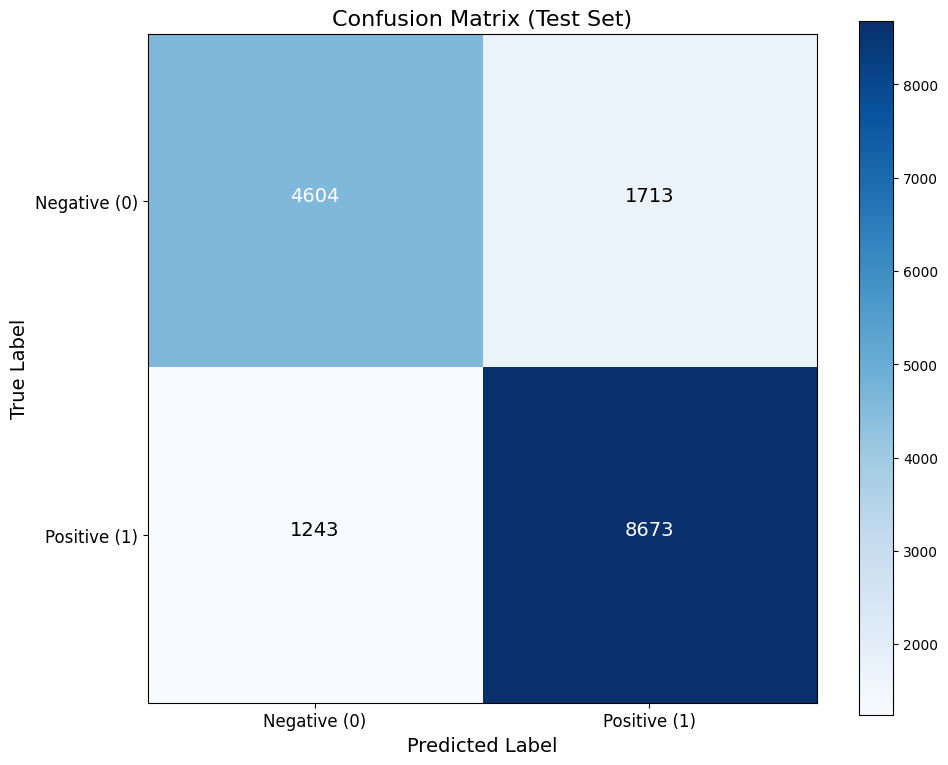

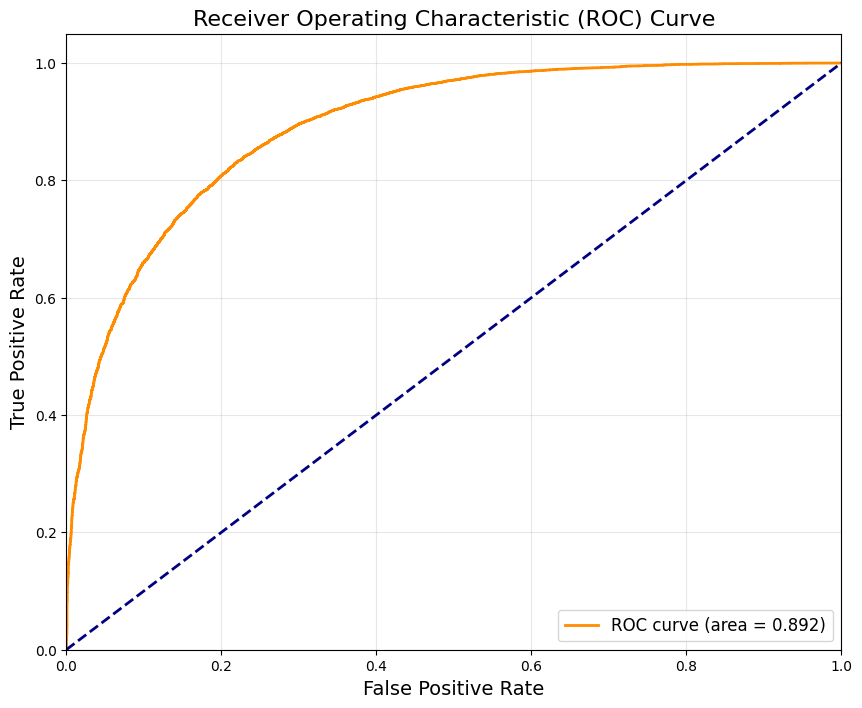

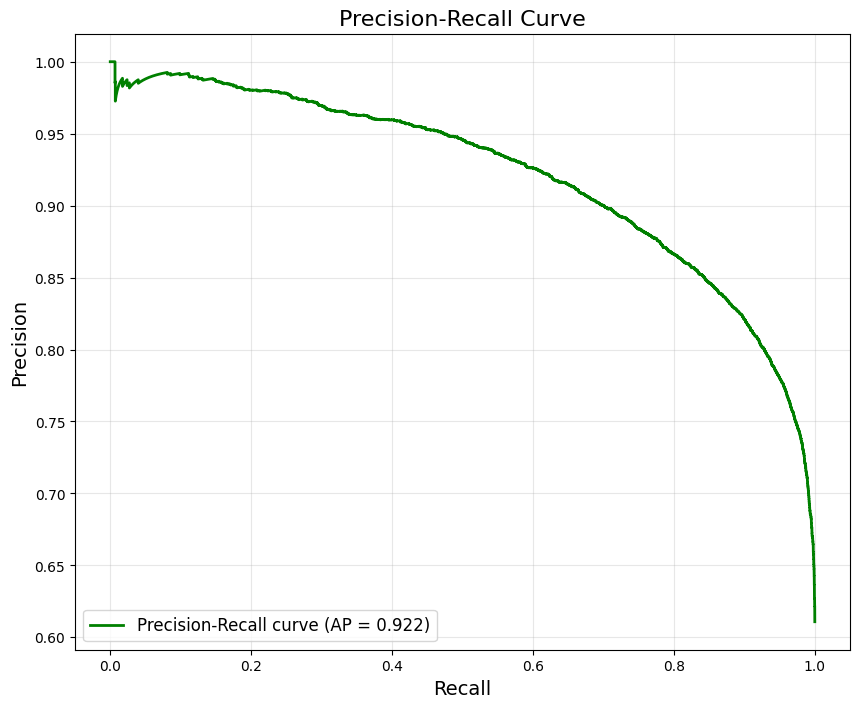


Test evaluation complete and results saved!

FINAL RESULTS SUMMARY
Best validation F1:  0.8503
Test F1:             0.8544
Test Precision:      0.8351
Test Recall:         0.8746
Test ROC AUC:        0.8918


In [ ]:
# Function to evaluate model on test set
def evaluate_on_test_set(model, test_df, best_params, raw_train):
    print("\n" + "="*80)
    print(" EVALUATING FINAL MODEL ON TEST SET")
    print("="*80)


    test_data = test_df.copy()


    scaler = StandardScaler().fit(raw_train[NUM_COLS])
    test_data[NUM_COLS] = scaler.transform(test_data[NUM_COLS])


    for col in CAT_COLS:

        le = LabelEncoder().fit(raw_train[col].astype(str))


        test_col = test_data[col].astype(str)

        unseen = np.setdiff1d(test_col.unique(), raw_train[col].astype(str).unique())

        if len(unseen) > 0:
            logger.info(f"Found {len(unseen)} unseen categories in '{col}' column of test set.")
            # Replace unseen values with the most frequent value from training
            most_frequent = raw_train[col].astype(str).value_counts().index[0]
            for val in unseen:
                test_col = test_col.replace(val, most_frequent)

        # Apply transformation
        test_data[col] = le.transform(test_col)

    # Create test DataLoader
    test_loader = DataLoader(
        MultiTokenDataset(test_data),
        batch_size=best_params['batch_size'],
        shuffle=False,
        pin_memory=True,
        num_workers=4
    )

    # Set up loss function
    criterion = nn.BCEWithLogitsLoss()

    # Evaluate model
    test_loss, test_f1, test_preds, test_trues = eval_epoch(model, test_loader, criterion)




    # Calculate ROC AUC
    roc_auc = roc_auc_score(test_trues, test_preds)

    # Print evaluation results
    print(f"\nTest Loss: {test_loss:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")
    print(f"Test ROC AUC: {roc_auc:.4f}")

    # Calculate detailed metrics
    print("\n===== FINAL MODEL METRICS ON TEST SET =====")
    test_metrics = calculate_metrics(test_trues, test_preds)

    # Add ROC AUC to metrics
    test_metrics['roc_auc'] = roc_auc

    # Create confusion matrix visualization
    cm = confusion_matrix(test_trues, (np.array(test_preds) >= 0.5).astype(int))

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix (Test Set)', fontsize=16)
    plt.colorbar()

    classes = ['Negative (0)', 'Positive (1)']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=14)

    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.tight_layout()
    plt.savefig('test_confusion_matrix.png')
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(test_trues, test_preds)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.savefig('test_roc_curve.png')
    plt.show()

    # Plot precision-recall curve
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(test_trues, test_preds)
    avg_precision = average_precision_score(test_trues, test_preds)

    plt.figure(figsize=(10, 8))
    plt.plot(recall, precision, color='green', lw=2,
             label=f'Precision-Recall curve (AP = {avg_precision:.3f})')
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall Curve', fontsize=16)
    plt.legend(loc="lower left", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.savefig('test_precision_recall_curve.png')
    plt.show()

    # Save predictions for further analysis
    pred_df = pd.DataFrame({
        'true_values': test_trues,
        'predictions': test_preds,
        'binary_predictions': (np.array(test_preds) >= 0.5).astype(int)
    })
    pred_df.to_csv('test_predictions.csv', index=False)

    # Return test metrics
    return {
        'test_loss': test_loss,
        'test_f1': test_f1,
        'roc_auc': roc_auc,
        'metrics': test_metrics,
        'predictions': test_preds,
        'true_values': test_trues
    }

# Add this at the end of the main block:
if __name__ == "__main__":
    # ... (existing code)

    # After the final model has been trained and results saved:
    print("\n\nEvaluating final model on test set...")

    # Load the best model
    final_model = MultiTokenEarlyFusionTransformer(
        len(NUM_COLS),
        len(BOOL_COLS),
        {c: raw_train[c].nunique() for c in CAT_COLS},
        heads=final_params['heads'],
        ff=final_params['ff'],
        layers=final_params['layers'],
        drop=final_params['drop'],
        activation='gelu'
    ).to(device)

    final_model.load_state_dict(torch.load("best_final_model.pt"))

    # Evaluate on test set
    test_results = evaluate_on_test_set(final_model, test_df, final_params, raw_train)

    # Add test results to the saved results
    results_to_save['test_results'] = test_results

    # Save the updated results
    with open('model_results.pkl', 'wb') as f:
        pickle.dump(results_to_save, f)

    print("\nTest evaluation complete and results saved!")

    # Final summary
    print("\n" + "="*50)
    print("FINAL RESULTS SUMMARY")
    print("="*50)
    print(f"Best validation F1:  {final_results['metrics']['f1']:.4f}")
    print(f"Test F1:             {test_results['test_f1']:.4f}")
    print(f"Test Precision:      {test_results['metrics']['precision']:.4f}")
    print(f"Test Recall:         {test_results['metrics']['recall']:.4f}")
    print(f"Test ROC AUC:        {test_results['roc_auc']:.4f}")
    print("="*50)

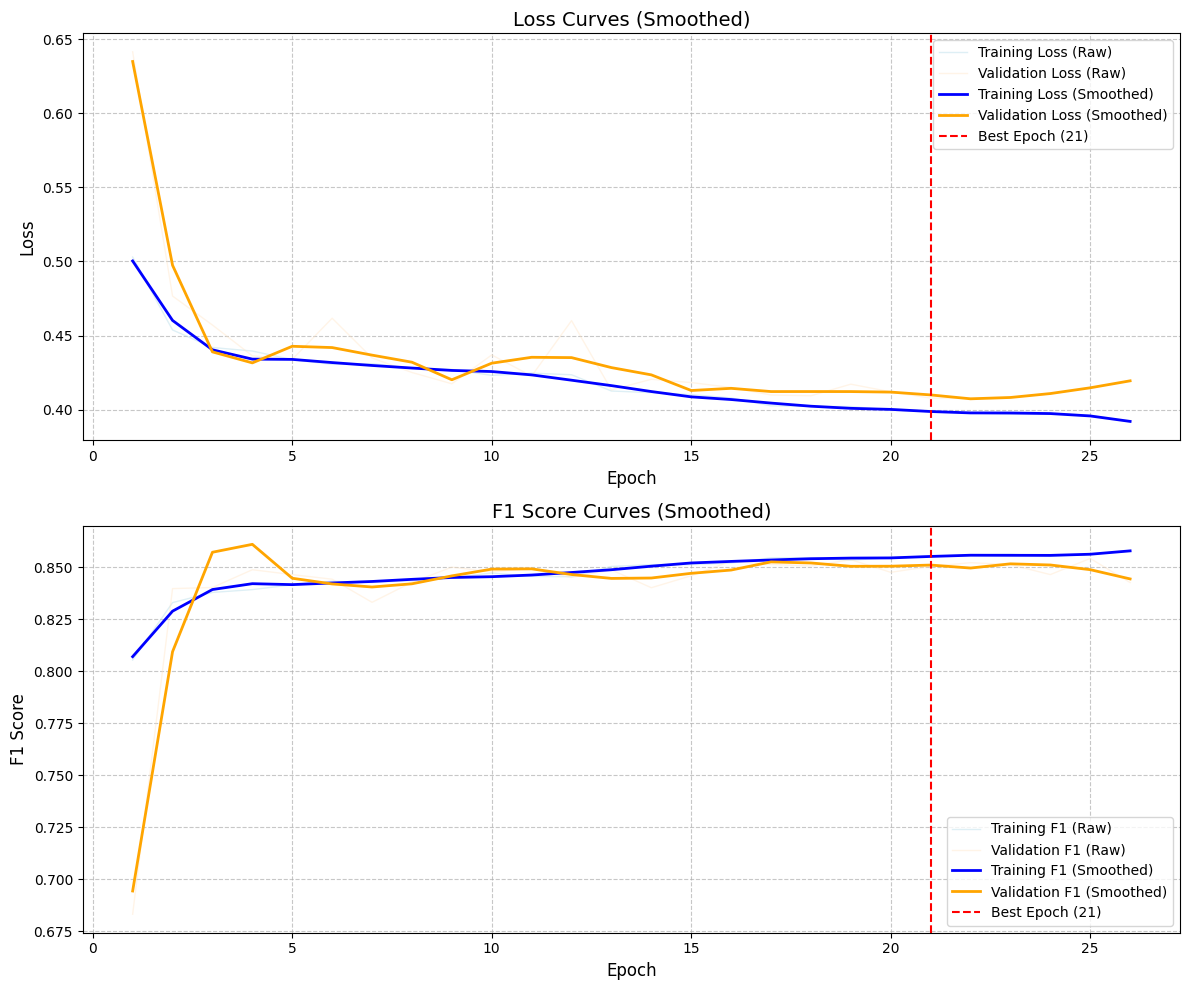

Enhanced smoothed curves saved to fixed_smoothed_curves.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_smoothed_curves_fixed(history, best_epoch, window=7, save_path='fixed_smoothed_curves.png'):

    # Get data from history
    epochs = history['epoch']
    train_loss = history['train_loss']
    val_loss = history['val_loss']
    train_f1 = history['train_f1']
    val_f1 = history['val_f1']


    poly_order = min(3, window - 1)

    # Apply smoothing if enough data points
    if len(epochs) >= window:
        train_loss_smooth = savgol_filter(train_loss, window, poly_order)
        val_loss_smooth = savgol_filter(val_loss, window, poly_order)
        train_f1_smooth = savgol_filter(train_f1, window, poly_order)
        val_f1_smooth = savgol_filter(val_f1, window, poly_order)
    else:
        # If not enough data points, use original data
        train_loss_smooth = train_loss
        val_loss_smooth = val_loss
        train_f1_smooth = train_f1
        val_f1_smooth = val_f1

    # Create figure with higher quality appearance
    plt.figure(figsize=(12, 10), dpi=100)

    # Plot Loss Curves
    plt.subplot(2, 1, 1)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Original data with light colors and low alpha
    plt.plot(epochs, train_loss, color='lightblue', alpha=0.4, linewidth=1, label='Training Loss (Raw)')
    plt.plot(epochs, val_loss, color='bisque', alpha=0.4, linewidth=1, label='Validation Loss (Raw)')

    # Smoothed data with vivid colors and higher line width
    plt.plot(epochs, train_loss_smooth, color='blue', linewidth=2, label='Training Loss (Smoothed)')
    plt.plot(epochs, val_loss_smooth, color='orange', linewidth=2, label='Validation Loss (Smoothed)')

    # Best epoch line
    plt.axvline(x=best_epoch, color='red', linestyle='--', linewidth=1.5, label=f'Best Epoch ({best_epoch})')

    plt.title('Loss Curves (Smoothed)', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='upper right', frameon=True)

    # Plot F1 Score Curves
    plt.subplot(2, 1, 2)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Original data with light colors and low alpha
    plt.plot(epochs, train_f1, color='lightblue', alpha=0.4, linewidth=1, label='Training F1 (Raw)')
    plt.plot(epochs, val_f1, color='bisque', alpha=0.4, linewidth=1, label='Validation F1 (Raw)')

    # Smoothed data with vivid colors and higher line width
    plt.plot(epochs, train_f1_smooth, color='blue', linewidth=2, label='Training F1 (Smoothed)')
    plt.plot(epochs, val_f1_smooth, color='orange', linewidth=2, label='Validation F1 (Smoothed)')

    # Best epoch line
    plt.axvline(x=best_epoch, color='red', linestyle='--', linewidth=1.5, label=f'Best Epoch ({best_epoch})')

    plt.title('F1 Score Curves (Smoothed)', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    plt.legend(loc='lower right', frameon=True)

    # Tight layout and save figure
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', dpi=150)
    plt.show()

    print(f"Enhanced smoothed curves saved to {save_path}")


plot_smoothed_curves_fixed(
     history=final_results['history'],
     best_epoch=final_results['best_epoch'],
     window=7  )

In [ ]:
import shutil
import os

# Define the directory to save files
save_dir = '/content/drive/MyDrive/Earlyfusion_pretrain_final_code_result'
os.makedirs(save_dir, exist_ok=True)

# List of files to save (relative to current directory)
files_to_save = [
    'best_final_model.pt',                  # Final trained model file
    'test_predictions.csv',                 # Test set prediction results
    'full_country_performance_analysis.csv',# Country-level performance analysis
    'fixed_smoothed_curves.png',            # Smoothed training curves image
    'test_confusion_matrix.png',            # Confusion matrix visualization
    'test_roc_curve.png',                   # ROC curve visualization
    'test_precision_recall_curve.png',      # Precision-Recall curve visualization
    'model_results.pkl',                    # Complete model results and training history
]

# Add fold-specific history pickle files (assuming 5 folds)
for fold in range(1, 6):
    fold_history = f'fold_{fold}_history.pkl'
    files_to_save.append(fold_history)
    files_to_save.append(f'best_outer_{fold}.pt')

# Execute file copying
for file in files_to_save:
    if os.path.exists(file):
        shutil.copy(file, save_dir)
        print(f"✅ Saved: {file}")
    else:
        print(f"⚠️ File not found (skipped): {file}")

print(f"\n🎉 All results have been successfully saved to '{save_dir}'.")


✅ Saved: best_final_model.pt
✅ Saved: test_predictions.csv
✅ Saved: full_country_performance_analysis.csv
✅ Saved: fixed_smoothed_curves.png
✅ Saved: test_confusion_matrix.png
✅ Saved: test_roc_curve.png
✅ Saved: test_precision_recall_curve.png
✅ Saved: model_results.pkl
✅ Saved: fold_1_history.pkl
✅ Saved: best_outer_1.pt
✅ Saved: fold_2_history.pkl
✅ Saved: best_outer_2.pt
✅ Saved: fold_3_history.pkl
✅ Saved: best_outer_3.pt
✅ Saved: fold_4_history.pkl
✅ Saved: best_outer_4.pt
✅ Saved: fold_5_history.pkl
✅ Saved: best_outer_5.pt

🎉 All results have been successfully saved to '/content/drive/MyDrive/Earlyfusion_pretrain_final_code_result'.
